# Warning

CatBoost is hosted in Russia via Yandex servers. Please do access [catboost.ai](catboost.ai) with care.

# CatBoost Test

This notebook will contain a sample use of the XGBoost library to determine feasibility in use for the study 

**[Evaluation and Comparison of Boosted ML Models in Behavior-Based Malware Detection]**

## GPU Support

CatBoost supports training on GPUs. Refer to this [link](https://catboost.ai/en/docs/features/training-on-gpu) for more information.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split #For Splitting Datasets
from sklearn import preprocessing #For LabelEncoding
from sklearn.metrics import classification_report #For Classification Report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #For Confusion Matrix
import matplotlib.pyplot as plt #For figure plotting.
from sklearn.model_selection import RandomizedSearchCV #For automated hyperparameter tuning; Would be better if it was GridSearchCV

# 1. Installation

*This test will only use Python version of XGBoost. There are two ways it could be installed which are through Python's pip or Conda (via Anaconda). For this test we'll be using Python via Anaconda instead.*

1. Open your Anaconda Terminal
2. Enter `pip install catboost`

# 2. Verifying Library Installation

*As long as it does not show an error upon importing, it means that it works*

In [2]:
#Verifying installation of XGBoost
import catboost as catb

# 3. Sample Dataset

*For this sample, the [crops dataset](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset) similar in [this notebook](https://github.com/jm55/CSINTSY-MCO-5/blob/main/Machine%20Learning/notebook-v2.2.ipynb) will be ued in this demo.*

In [3]:
crops_df = pd.read_csv('crops_dataset.csv')
crops_df

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
len(crops_df['label'].unique())

22

## Reminder

Note that the dataset is a multi-class dataset which means that the output is not simply 0 or 1 like the case of the official thesis document. Hence, there will be some differences in the real study.

# 4. Implementing XGBoost Classifier

*This demonstrates the use of the SKLearn like implementation/use of XGBoost with the other parameters as well as other related functions and properties is as shown in this [link](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier)*.

Sample Complete Parameters (not all are included in the example):

`catb.CatBoostClassifier(iterations=None, learning_rate=None, depth=None, l2_leaf_reg=None, model_size_reg=None, rsm=None, loss_function=None, border_count=None, feature_border_type=None, per_float_feature_quantization=None, input_borders=None, output_borders=None, fold_permutation_block=None, od_pval=None, od_wait=None, od_type=None, nan_mode=None, counter_calc_method=None, leaf_estimation_iterations=None, leaf_estimation_method=None, thread_count=None, random_seed=None, use_best_model=None, verbose=None, logging_level=None, metric_period=None, ctr_leaf_count_limit=None, store_all_simple_ctr=None, max_ctr_complexity=None, has_time=None, allow_const_label=None, classes_count=None, class_weights=None, auto_class_weights=None, one_hot_max_size=None, random_strength=None, name=None, ignored_features=None, train_dir=None, custom_loss=None, custom_metric=None, eval_metric=None, bagging_temperature=None, save_snapshot=None, snapshot_file=None, snapshot_interval=None, fold_len_multiplier=None, used_ram_limit=None, gpu_ram_part=None, allow_writing_files=None, final_ctr_computation_mode=None, approx_on_full_history=None, boosting_type=None, simple_ctr=None, combinations_ctr=None, per_feature_ctr=None, task_type=None, device_config=None, devices=None, bootstrap_type=None, subsample=None, sampling_unit=None, dev_score_calc_obj_block_size=None, max_depth=None, n_estimators=None, num_boost_round=None, num_trees=None, colsample_bylevel=None, random_state=None, reg_lambda=None, objective=None, eta=None, max_bin=None, scale_pos_weight=None, gpu_cat_features_storage=None, data_partition=None metadata=None, early_stopping_rounds=None, cat_features=None, grow_policy=None, min_data_in_leaf=None, min_child_samples=None, max_leaves=None, num_leaves=None, score_function=None, leaf_estimation_backtracking=None, ctr_history_unit=None, monotone_constraints=None, feature_weights=None, penalties_coefficient=None, first_feature_use_penalties=None, model_shrink_rate=None, model_shrink_mode=None, langevin=None, diffusion_temperature=None, posterior_sampling=None, boost_from_average=None, text_features=None, tokenizers=None, dictionaries=None, feature_calcers=None, text_processing=None, fixed_binary_splits=None)`

## 4.1. Loading Classifier

In [5]:
#Loading XGBClassifier as an object
catbClassifier = catb.CatBoostClassifier()

## 4.2. Splitting Datasets to Train and Test Datasets

In [6]:
#Splitting datasets to train and test datasets
features = crops_df.columns.to_list()
features = features[0:len(features)-2]

le = preprocessing.LabelEncoder()
labels = le.fit_transform(crops_df['label']) #Converting t

X,y = crops_df[features],labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

## 4.3. Loading Hyperparameter Tuning

Parameters: https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier

Note that the hyperparameter values shown in the tuning choices here are not complete as some values were ommited due to errors or to improve tuning speed relative to the available hardware. 

Booster `'dart'` may be better performing but at the extreme cost of time as tests suggests that it runs at ~30mins each iteration during RandomizedSearchCV, hence it was removed on this demo.

In [7]:
param = {'sampling_frequency':['PerTree','PerTreeLevel'], 'learning_rate': [0.3], 
         'thread_count':[-1], 'classes_count':[22], 'grow_policy':['SymmetricTree','Depthwise','Lossguide']}

tuner = RandomizedSearchCV(catbClassifier, param, verbose=2, n_jobs=2, cv=3, refit=True, error_score=0, random_state=1)
tuner.fit(X_train,y_train)
print("Best Score:", tuner.best_score_)
print("Best Params:", tuner.best_params_)

C:\Users\ejose\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\ejose\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ejose\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ejose\anaconda3\Lib\site-packages\catboost\core.py", line 5100, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\ejose\anaconda3\Lib\site-packages\catboost\core.py", line 2303, in _f

0:	learn: 1.3470830	total: 171ms	remaining: 2m 50s
1:	learn: 0.9829517	total: 192ms	remaining: 1m 35s
2:	learn: 0.7706004	total: 215ms	remaining: 1m 11s
3:	learn: 0.6320477	total: 237ms	remaining: 59.1s
4:	learn: 0.5427660	total: 257ms	remaining: 51.2s
5:	learn: 0.4480382	total: 276ms	remaining: 45.7s
6:	learn: 0.3813307	total: 296ms	remaining: 42s
7:	learn: 0.3315579	total: 318ms	remaining: 39.5s
8:	learn: 0.2941442	total: 340ms	remaining: 37.5s
9:	learn: 0.2672716	total: 363ms	remaining: 36s
10:	learn: 0.2404963	total: 388ms	remaining: 34.9s
11:	learn: 0.2177222	total: 410ms	remaining: 33.8s
12:	learn: 0.2018473	total: 431ms	remaining: 32.7s
13:	learn: 0.1859018	total: 453ms	remaining: 31.9s
14:	learn: 0.1783579	total: 472ms	remaining: 31s
15:	learn: 0.1656448	total: 491ms	remaining: 30.2s
16:	learn: 0.1568481	total: 514ms	remaining: 29.7s
17:	learn: 0.1467523	total: 533ms	remaining: 29.1s
18:	learn: 0.1394459	total: 554ms	remaining: 28.6s
19:	learn: 0.1340723	total: 576ms	remaining:

164:	learn: 0.0155069	total: 3.87s	remaining: 19.6s
165:	learn: 0.0154567	total: 3.9s	remaining: 19.6s
166:	learn: 0.0153769	total: 3.93s	remaining: 19.6s
167:	learn: 0.0152845	total: 3.95s	remaining: 19.6s
168:	learn: 0.0150989	total: 3.98s	remaining: 19.6s
169:	learn: 0.0149579	total: 4s	remaining: 19.5s
170:	learn: 0.0148706	total: 4.03s	remaining: 19.5s
171:	learn: 0.0147753	total: 4.05s	remaining: 19.5s
172:	learn: 0.0146443	total: 4.08s	remaining: 19.5s
173:	learn: 0.0145075	total: 4.11s	remaining: 19.5s
174:	learn: 0.0144236	total: 4.13s	remaining: 19.5s
175:	learn: 0.0143609	total: 4.16s	remaining: 19.5s
176:	learn: 0.0142016	total: 4.18s	remaining: 19.4s
177:	learn: 0.0140871	total: 4.21s	remaining: 19.4s
178:	learn: 0.0140231	total: 4.23s	remaining: 19.4s
179:	learn: 0.0139278	total: 4.25s	remaining: 19.4s
180:	learn: 0.0138703	total: 4.28s	remaining: 19.4s
181:	learn: 0.0137996	total: 4.3s	remaining: 19.3s
182:	learn: 0.0137314	total: 4.33s	remaining: 19.3s
183:	learn: 0.013

328:	learn: 0.0068946	total: 8.06s	remaining: 16.4s
329:	learn: 0.0068680	total: 8.09s	remaining: 16.4s
330:	learn: 0.0068351	total: 8.12s	remaining: 16.4s
331:	learn: 0.0068085	total: 8.14s	remaining: 16.4s
332:	learn: 0.0067881	total: 8.17s	remaining: 16.4s
333:	learn: 0.0067680	total: 8.2s	remaining: 16.4s
334:	learn: 0.0067387	total: 8.23s	remaining: 16.3s
335:	learn: 0.0067290	total: 8.26s	remaining: 16.3s
336:	learn: 0.0067046	total: 8.29s	remaining: 16.3s
337:	learn: 0.0066944	total: 8.32s	remaining: 16.3s
338:	learn: 0.0066677	total: 8.35s	remaining: 16.3s
339:	learn: 0.0066577	total: 8.38s	remaining: 16.3s
340:	learn: 0.0066478	total: 8.4s	remaining: 16.2s
341:	learn: 0.0066292	total: 8.43s	remaining: 16.2s
342:	learn: 0.0066064	total: 8.46s	remaining: 16.2s
343:	learn: 0.0065833	total: 8.5s	remaining: 16.2s
344:	learn: 0.0065740	total: 8.55s	remaining: 16.2s
345:	learn: 0.0065484	total: 8.59s	remaining: 16.2s
346:	learn: 0.0065363	total: 8.62s	remaining: 16.2s
347:	learn: 0.0

491:	learn: 0.0043619	total: 12.4s	remaining: 12.8s
492:	learn: 0.0043548	total: 12.5s	remaining: 12.8s
493:	learn: 0.0043445	total: 12.5s	remaining: 12.8s
494:	learn: 0.0043368	total: 12.5s	remaining: 12.8s
495:	learn: 0.0043294	total: 12.5s	remaining: 12.7s
496:	learn: 0.0043202	total: 12.6s	remaining: 12.7s
497:	learn: 0.0043139	total: 12.6s	remaining: 12.7s
498:	learn: 0.0043050	total: 12.6s	remaining: 12.7s
499:	learn: 0.0042950	total: 12.6s	remaining: 12.6s
500:	learn: 0.0042886	total: 12.7s	remaining: 12.6s
501:	learn: 0.0042826	total: 12.7s	remaining: 12.6s
502:	learn: 0.0042714	total: 12.7s	remaining: 12.6s
503:	learn: 0.0042552	total: 12.7s	remaining: 12.5s
504:	learn: 0.0042455	total: 12.8s	remaining: 12.5s
505:	learn: 0.0042385	total: 12.8s	remaining: 12.5s
506:	learn: 0.0042337	total: 12.8s	remaining: 12.4s
507:	learn: 0.0042285	total: 12.8s	remaining: 12.4s
508:	learn: 0.0042164	total: 12.8s	remaining: 12.4s
509:	learn: 0.0042045	total: 12.9s	remaining: 12.4s
510:	learn: 

651:	learn: 0.0032122	total: 16.6s	remaining: 8.87s
652:	learn: 0.0032099	total: 16.7s	remaining: 8.85s
653:	learn: 0.0032047	total: 16.7s	remaining: 8.82s
654:	learn: 0.0031935	total: 16.7s	remaining: 8.79s
655:	learn: 0.0031905	total: 16.7s	remaining: 8.77s
656:	learn: 0.0031825	total: 16.7s	remaining: 8.74s
657:	learn: 0.0031758	total: 16.8s	remaining: 8.71s
658:	learn: 0.0031716	total: 16.8s	remaining: 8.69s
659:	learn: 0.0031699	total: 16.8s	remaining: 8.66s
660:	learn: 0.0031658	total: 16.8s	remaining: 8.64s
661:	learn: 0.0031625	total: 16.9s	remaining: 8.61s
662:	learn: 0.0031523	total: 16.9s	remaining: 8.59s
663:	learn: 0.0031490	total: 16.9s	remaining: 8.56s
664:	learn: 0.0031423	total: 16.9s	remaining: 8.53s
665:	learn: 0.0031402	total: 17s	remaining: 8.51s
666:	learn: 0.0031352	total: 17s	remaining: 8.48s
667:	learn: 0.0031305	total: 17s	remaining: 8.45s
668:	learn: 0.0031252	total: 17s	remaining: 8.42s
669:	learn: 0.0031212	total: 17s	remaining: 8.4s
670:	learn: 0.0031175	t

812:	learn: 0.0025169	total: 20.6s	remaining: 4.74s
813:	learn: 0.0025140	total: 20.7s	remaining: 4.72s
814:	learn: 0.0025073	total: 20.7s	remaining: 4.7s
815:	learn: 0.0025030	total: 20.7s	remaining: 4.67s
816:	learn: 0.0024985	total: 20.8s	remaining: 4.65s
817:	learn: 0.0024968	total: 20.8s	remaining: 4.62s
818:	learn: 0.0024949	total: 20.8s	remaining: 4.6s
819:	learn: 0.0024937	total: 20.8s	remaining: 4.58s
820:	learn: 0.0024924	total: 20.9s	remaining: 4.55s
821:	learn: 0.0024898	total: 20.9s	remaining: 4.53s
822:	learn: 0.0024882	total: 20.9s	remaining: 4.5s
823:	learn: 0.0024838	total: 21s	remaining: 4.48s
824:	learn: 0.0024776	total: 21s	remaining: 4.45s
825:	learn: 0.0024763	total: 21s	remaining: 4.43s
826:	learn: 0.0024697	total: 21s	remaining: 4.4s
827:	learn: 0.0024669	total: 21.1s	remaining: 4.38s
828:	learn: 0.0024631	total: 21.1s	remaining: 4.35s
829:	learn: 0.0024614	total: 21.1s	remaining: 4.33s
830:	learn: 0.0024588	total: 21.2s	remaining: 4.3s
831:	learn: 0.0024557	tot

971:	learn: 0.0020880	total: 24.6s	remaining: 708ms
972:	learn: 0.0020869	total: 24.6s	remaining: 683ms
973:	learn: 0.0020856	total: 24.6s	remaining: 658ms
974:	learn: 0.0020815	total: 24.7s	remaining: 632ms
975:	learn: 0.0020768	total: 24.7s	remaining: 607ms
976:	learn: 0.0020750	total: 24.7s	remaining: 581ms
977:	learn: 0.0020720	total: 24.7s	remaining: 556ms
978:	learn: 0.0020704	total: 24.7s	remaining: 531ms
979:	learn: 0.0020669	total: 24.8s	remaining: 505ms
980:	learn: 0.0020632	total: 24.8s	remaining: 480ms
981:	learn: 0.0020621	total: 24.8s	remaining: 455ms
982:	learn: 0.0020592	total: 24.8s	remaining: 429ms
983:	learn: 0.0020563	total: 24.8s	remaining: 404ms
984:	learn: 0.0020532	total: 24.9s	remaining: 379ms
985:	learn: 0.0020515	total: 24.9s	remaining: 353ms
986:	learn: 0.0020476	total: 24.9s	remaining: 328ms
987:	learn: 0.0020463	total: 24.9s	remaining: 303ms
988:	learn: 0.0020448	total: 25s	remaining: 278ms
989:	learn: 0.0020422	total: 25s	remaining: 252ms
990:	learn: 0.00

## 4.4. Loading Tuned Parameters to Model

In [8]:
#Reloading model with better parameters
catbClassifier = catb.CatBoostClassifier(**tuner.best_params_)

#Fitting/Training model
catbClassifier.fit(X_train, y_train)

0:	learn: 1.3470830	total: 27.7ms	remaining: 27.7s
1:	learn: 0.9829517	total: 49.4ms	remaining: 24.6s
2:	learn: 0.7706004	total: 72ms	remaining: 23.9s
3:	learn: 0.6320477	total: 93.8ms	remaining: 23.3s
4:	learn: 0.5427660	total: 114ms	remaining: 22.7s
5:	learn: 0.4480382	total: 133ms	remaining: 22.1s
6:	learn: 0.3813307	total: 153ms	remaining: 21.7s
7:	learn: 0.3315579	total: 174ms	remaining: 21.6s
8:	learn: 0.2941442	total: 196ms	remaining: 21.6s
9:	learn: 0.2672716	total: 217ms	remaining: 21.5s
10:	learn: 0.2404963	total: 240ms	remaining: 21.6s
11:	learn: 0.2177222	total: 262ms	remaining: 21.6s
12:	learn: 0.2018473	total: 281ms	remaining: 21.3s
13:	learn: 0.1859018	total: 302ms	remaining: 21.3s
14:	learn: 0.1783579	total: 321ms	remaining: 21.1s
15:	learn: 0.1656448	total: 341ms	remaining: 21s
16:	learn: 0.1568481	total: 363ms	remaining: 21s
17:	learn: 0.1467523	total: 382ms	remaining: 20.9s
18:	learn: 0.1394459	total: 403ms	remaining: 20.8s
19:	learn: 0.1340723	total: 424ms	remaining

168:	learn: 0.0150989	total: 3.96s	remaining: 19.4s
169:	learn: 0.0149579	total: 3.98s	remaining: 19.4s
170:	learn: 0.0148706	total: 4s	remaining: 19.4s
171:	learn: 0.0147753	total: 4.02s	remaining: 19.4s
172:	learn: 0.0146443	total: 4.04s	remaining: 19.3s
173:	learn: 0.0145075	total: 4.07s	remaining: 19.3s
174:	learn: 0.0144236	total: 4.1s	remaining: 19.3s
175:	learn: 0.0143609	total: 4.13s	remaining: 19.3s
176:	learn: 0.0142016	total: 4.16s	remaining: 19.3s
177:	learn: 0.0140871	total: 4.18s	remaining: 19.3s
178:	learn: 0.0140231	total: 4.21s	remaining: 19.3s
179:	learn: 0.0139278	total: 4.24s	remaining: 19.3s
180:	learn: 0.0138703	total: 4.27s	remaining: 19.3s
181:	learn: 0.0137996	total: 4.29s	remaining: 19.3s
182:	learn: 0.0137314	total: 4.34s	remaining: 19.4s
183:	learn: 0.0136477	total: 4.37s	remaining: 19.4s
184:	learn: 0.0136005	total: 4.4s	remaining: 19.4s
185:	learn: 0.0134790	total: 4.43s	remaining: 19.4s
186:	learn: 0.0133839	total: 4.45s	remaining: 19.4s
187:	learn: 0.013

328:	learn: 0.0068946	total: 8.13s	remaining: 16.6s
329:	learn: 0.0068680	total: 8.16s	remaining: 16.6s
330:	learn: 0.0068351	total: 8.19s	remaining: 16.6s
331:	learn: 0.0068085	total: 8.22s	remaining: 16.5s
332:	learn: 0.0067881	total: 8.25s	remaining: 16.5s
333:	learn: 0.0067680	total: 8.28s	remaining: 16.5s
334:	learn: 0.0067387	total: 8.31s	remaining: 16.5s
335:	learn: 0.0067290	total: 8.33s	remaining: 16.5s
336:	learn: 0.0067046	total: 8.35s	remaining: 16.4s
337:	learn: 0.0066944	total: 8.38s	remaining: 16.4s
338:	learn: 0.0066677	total: 8.4s	remaining: 16.4s
339:	learn: 0.0066577	total: 8.42s	remaining: 16.4s
340:	learn: 0.0066478	total: 8.45s	remaining: 16.3s
341:	learn: 0.0066292	total: 8.47s	remaining: 16.3s
342:	learn: 0.0066064	total: 8.49s	remaining: 16.3s
343:	learn: 0.0065833	total: 8.51s	remaining: 16.2s
344:	learn: 0.0065740	total: 8.54s	remaining: 16.2s
345:	learn: 0.0065484	total: 8.56s	remaining: 16.2s
346:	learn: 0.0065363	total: 8.58s	remaining: 16.1s
347:	learn: 0

491:	learn: 0.0043619	total: 12.4s	remaining: 12.8s
492:	learn: 0.0043548	total: 12.5s	remaining: 12.8s
493:	learn: 0.0043445	total: 12.5s	remaining: 12.8s
494:	learn: 0.0043368	total: 12.5s	remaining: 12.8s
495:	learn: 0.0043294	total: 12.5s	remaining: 12.8s
496:	learn: 0.0043202	total: 12.6s	remaining: 12.7s
497:	learn: 0.0043139	total: 12.6s	remaining: 12.7s
498:	learn: 0.0043050	total: 12.6s	remaining: 12.7s
499:	learn: 0.0042950	total: 12.7s	remaining: 12.7s
500:	learn: 0.0042886	total: 12.7s	remaining: 12.6s
501:	learn: 0.0042826	total: 12.7s	remaining: 12.6s
502:	learn: 0.0042714	total: 12.7s	remaining: 12.6s
503:	learn: 0.0042552	total: 12.8s	remaining: 12.6s
504:	learn: 0.0042455	total: 12.8s	remaining: 12.6s
505:	learn: 0.0042385	total: 12.9s	remaining: 12.5s
506:	learn: 0.0042337	total: 12.9s	remaining: 12.5s
507:	learn: 0.0042285	total: 12.9s	remaining: 12.5s
508:	learn: 0.0042164	total: 12.9s	remaining: 12.5s
509:	learn: 0.0042045	total: 13s	remaining: 12.4s
510:	learn: 0.

658:	learn: 0.0031716	total: 16.6s	remaining: 8.6s
659:	learn: 0.0031699	total: 16.7s	remaining: 8.58s
660:	learn: 0.0031658	total: 16.7s	remaining: 8.55s
661:	learn: 0.0031625	total: 16.7s	remaining: 8.53s
662:	learn: 0.0031523	total: 16.7s	remaining: 8.5s
663:	learn: 0.0031490	total: 16.8s	remaining: 8.48s
664:	learn: 0.0031423	total: 16.8s	remaining: 8.45s
665:	learn: 0.0031402	total: 16.8s	remaining: 8.42s
666:	learn: 0.0031352	total: 16.8s	remaining: 8.4s
667:	learn: 0.0031305	total: 16.8s	remaining: 8.37s
668:	learn: 0.0031252	total: 16.9s	remaining: 8.34s
669:	learn: 0.0031212	total: 16.9s	remaining: 8.32s
670:	learn: 0.0031175	total: 16.9s	remaining: 8.29s
671:	learn: 0.0031130	total: 16.9s	remaining: 8.26s
672:	learn: 0.0031065	total: 17s	remaining: 8.24s
673:	learn: 0.0031021	total: 17s	remaining: 8.21s
674:	learn: 0.0030967	total: 17s	remaining: 8.19s
675:	learn: 0.0030950	total: 17s	remaining: 8.16s
676:	learn: 0.0030883	total: 17s	remaining: 8.13s
677:	learn: 0.0030837	tot

822:	learn: 0.0024882	total: 20.5s	remaining: 4.41s
823:	learn: 0.0024838	total: 20.6s	remaining: 4.39s
824:	learn: 0.0024776	total: 20.6s	remaining: 4.37s
825:	learn: 0.0024763	total: 20.6s	remaining: 4.34s
826:	learn: 0.0024697	total: 20.7s	remaining: 4.33s
827:	learn: 0.0024669	total: 20.7s	remaining: 4.3s
828:	learn: 0.0024631	total: 20.7s	remaining: 4.28s
829:	learn: 0.0024614	total: 20.8s	remaining: 4.25s
830:	learn: 0.0024588	total: 20.8s	remaining: 4.23s
831:	learn: 0.0024557	total: 20.8s	remaining: 4.2s
832:	learn: 0.0024526	total: 20.8s	remaining: 4.18s
833:	learn: 0.0024481	total: 20.9s	remaining: 4.16s
834:	learn: 0.0024450	total: 20.9s	remaining: 4.13s
835:	learn: 0.0024433	total: 20.9s	remaining: 4.11s
836:	learn: 0.0024404	total: 21s	remaining: 4.08s
837:	learn: 0.0024388	total: 21s	remaining: 4.06s
838:	learn: 0.0024371	total: 21s	remaining: 4.03s
839:	learn: 0.0024340	total: 21s	remaining: 4.01s
840:	learn: 0.0024299	total: 21.1s	remaining: 3.98s
841:	learn: 0.0024271	

990:	learn: 0.0020404	total: 24.8s	remaining: 226ms
991:	learn: 0.0020377	total: 24.9s	remaining: 201ms
992:	learn: 0.0020366	total: 24.9s	remaining: 175ms
993:	learn: 0.0020343	total: 24.9s	remaining: 150ms
994:	learn: 0.0020306	total: 24.9s	remaining: 125ms
995:	learn: 0.0020287	total: 25s	remaining: 100ms
996:	learn: 0.0020281	total: 25s	remaining: 75.2ms
997:	learn: 0.0020253	total: 25s	remaining: 50.1ms
998:	learn: 0.0020232	total: 25s	remaining: 25ms
999:	learn: 0.0020193	total: 25s	remaining: 0us


## 4.5. Results

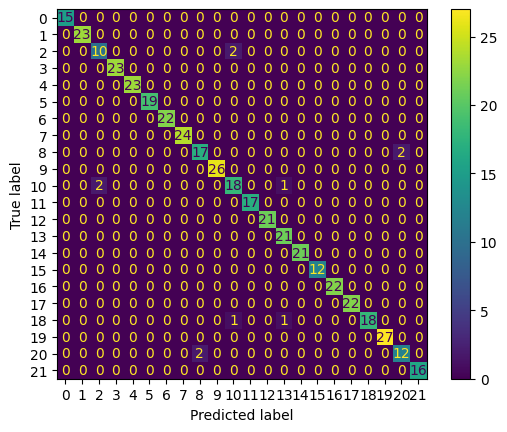

              precision    recall  f1-score   support

       apple     1.0000    1.0000    1.0000        15
      banana     1.0000    1.0000    1.0000        23
   blackgram     0.8333    0.8333    0.8333        12
    chickpea     1.0000    1.0000    1.0000        23
     coconut     1.0000    1.0000    1.0000        23
      coffee     1.0000    1.0000    1.0000        19
      cotton     1.0000    1.0000    1.0000        22
      grapes     1.0000    1.0000    1.0000        24
        jute     0.8947    0.8947    0.8947        19
 kidneybeans     1.0000    1.0000    1.0000        26
      lentil     0.8571    0.8571    0.8571        21
       maize     1.0000    1.0000    1.0000        17
       mango     1.0000    1.0000    1.0000        21
   mothbeans     0.9130    1.0000    0.9545        21
    mungbean     1.0000    1.0000    1.0000        21
   muskmelon     1.0000    1.0000    1.0000        12
      orange     1.0000    1.0000    1.0000        22
      papaya     1.0000    

C:\Users\ejose\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
#Testing Predictions
y_pred = catbClassifier.predict(X_test)

#Create confusion matrix
catb_cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=catb_cm)
disp.plot()
plt.show()

#Converting LabelEncoded to String Labels
y_pred_str = le.inverse_transform(y_pred)
y_test_str = le.inverse_transform(y_test)

#Create classification report
catb_cr = classification_report(y_test_str, y_pred_str, digits=4)
print(catb_cr)

# 5. Saving and Loading Model

In [11]:
from joblib import dump, load

catbClassifier.save_model("saved.json", format="json")

loaded_model = catbClassifier.load_model("saved.json", format='json')

y_pred = loaded_model.predict(X_test)

#Converting LabelEncoded to String Labels
y_pred_str = le.inverse_transform(y_pred)
y_test_str = le.inverse_transform(y_test)

#Create classification report
lgbm_cr = classification_report(y_test_str, y_pred_str, digits=4)
print(lgbm_cr)

              precision    recall  f1-score   support

       apple     1.0000    1.0000    1.0000        15
      banana     1.0000    1.0000    1.0000        23
   blackgram     0.8333    0.8333    0.8333        12
    chickpea     1.0000    1.0000    1.0000        23
     coconut     1.0000    1.0000    1.0000        23
      coffee     1.0000    1.0000    1.0000        19
      cotton     1.0000    1.0000    1.0000        22
      grapes     1.0000    1.0000    1.0000        24
        jute     0.8947    0.8947    0.8947        19
 kidneybeans     1.0000    1.0000    1.0000        26
      lentil     0.8571    0.8571    0.8571        21
       maize     1.0000    1.0000    1.0000        17
       mango     1.0000    1.0000    1.0000        21
   mothbeans     0.9130    1.0000    0.9545        21
    mungbean     1.0000    1.0000    1.0000        21
   muskmelon     1.0000    1.0000    1.0000        12
      orange     1.0000    1.0000    1.0000        22
      papaya     1.0000    

C:\Users\ejose\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
